In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as ius
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

In [3]:
#Matplotlib Parameters
plt.rcParams['axes.linewidth'] = 1.75

rc_params = {'backend': 'pdf',
             'axes.labelsize': 24,
             'axes.titlesize': 32,
             'font.size': 24,
             'legend.fontsize': 18,
             'xtick.labelsize': 18,
             'ytick.labelsize': 18,
             'font.family': 'serif',
             'mathtext.fontset': 'cm',         # Use Computer Modern math fonts (LaTeX style)
             'mathtext.rm': 'serif',  
             #'font.sans-serif': ['Bitstream Vera Sans'],
             #'font.serif': ['Times New Roman'],
             #'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
             #'text.usetex':False,
             'lines.linewidth': 3
            }

plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update(rc_params)

In [4]:
eos_data = np.loadtxt('/work/williams5/testing-urs/EOS/soft_mrlfmode.dat')
eos_mass = eos_data[:,1]
eos_lambda = eos_data[:,2]

soft_ml_interp = ius(eos_mass, eos_lambda)

eos_data = np.loadtxt('/work/williams5/testing-urs/EOS/stiff_mrlfmode.dat')
eos_mass = eos_data[:,1]
eos_lambda = eos_data[:,2]

stiff_ml_interp = ius(eos_mass, eos_lambda)

# Binary Love

In [5]:
soft_MM_BL=np.loadtxt('/work/williams5/testing-urs/bilby/scripts/mismatches/soft_MM_BL.txt')
stiff_MM_BL=np.loadtxt('/work/williams5/testing-urs/bilby/scripts/mismatches/stiff_MM_BL.txt')

masses_vector = np.linspace(1.0, 2.2, soft_MM_BL.shape[0])  # n = 200

# --- Soft BL ---
max_index_flat_BL_soft = np.nanargmax(soft_MM_BL)
max_i_BL_soft, max_j_BL_soft = np.unravel_index(max_index_flat_BL_soft, soft_MM_BL.shape)

m1_max_BL_soft = masses_vector[max_j_BL_soft]  # column = m1
m2_max_BL_soft = masses_vector[max_i_BL_soft]  # row = m2
max_value_BL_soft = np.nanmax(soft_MM_BL)

print("Soft BL EOS:")
print("Maximum value:", max_value_BL_soft)
print("Corresponding masses (m1, m2):", (m1_max_BL_soft, m2_max_BL_soft))


# --- Stiff BL ---
max_index_flat_BL_stiff = np.nanargmax(stiff_MM_BL)
max_i_BL_stiff, max_j_BL_stiff = np.unravel_index(max_index_flat_BL_stiff, stiff_MM_BL.shape)

m1_max_BL_stiff = masses_vector[max_j_BL_stiff]
m2_max_BL_stiff = masses_vector[max_i_BL_stiff]
max_value_BL_stiff = np.nanmax(stiff_MM_BL)

print("\nStiff BL EOS:")
print("Maximum value:", max_value_BL_stiff)
print("Corresponding masses (m1, m2):", (m1_max_BL_stiff, m2_max_BL_stiff))

Soft BL EOS:
Maximum value: 8.609200172682296e-05
Corresponding masses (m1, m2): (1.2894472361809046, 1.0301507537688441)

Stiff BL EOS:
Maximum value: 0.00013490644929281537
Corresponding masses (m1, m2): (1.6753768844221106, 1.042211055276382)


# Dynamical Tides

In [6]:
soft_MM_fmode=np.loadtxt('/work/williams5/testing-urs/bilby/scripts/mismatches/soft_MM_fmode.txt')
stiff_MM_fmode=np.loadtxt('/work/williams5/testing-urs/bilby/scripts/mismatches/stiff_MM_fmode.txt')

masses_vector = np.linspace(1.0, 2.2, soft_MM_fmode.shape[0])  # n = 200

# --- Soft fmode ---
max_index_flat_fmode_soft = np.nanargmax(soft_MM_fmode)
max_i_fmode_soft, max_j_fmode_soft = np.unravel_index(max_index_flat_fmode_soft, soft_MM_fmode.shape)

m1_max_fmode_soft = masses_vector[max_j_fmode_soft]  # column = m1
m2_max_fmode_soft = masses_vector[max_i_fmode_soft]  # row = m2
max_value_fmode_soft = np.nanmax(soft_MM_fmode)

print("Soft fmode EOS:")
print("Maximum value:", max_value_fmode_soft)
print("Corresponding masses (m1, m2):", (m1_max_fmode_soft, m2_max_fmode_soft))


# --- Stiff fmode ---
max_index_flat_fmode_stiff = np.nanargmax(stiff_MM_fmode)
max_i_fmode_stiff, max_j_fmode_stiff = np.unravel_index(max_index_flat_fmode_stiff, stiff_MM_fmode.shape)

m1_max_fmode_stiff = masses_vector[max_j_fmode_stiff]
m2_max_fmode_stiff = masses_vector[max_i_fmode_stiff]
max_value_fmode_stiff = np.nanmax(stiff_MM_fmode)

print("\nStiff fmode EOS:")
print("Maximum value:", max_value_fmode_stiff)
print("Corresponding masses (m1, m2):", (m1_max_fmode_stiff, m2_max_fmode_stiff))

Soft fmode EOS:
Maximum value: 5.090183279443661e-05
Corresponding masses (m1, m2): (1.2170854271356784, 1.0964824120603016)

Stiff fmode EOS:
Maximum value: 0.00025640641238799944
Corresponding masses (m1, m2): (1.0904522613065326, 1.0844221105527638)


# Quadrupole moment

In [7]:
# Load the quad mismatch arrays
soft_MM_quad = np.loadtxt('/work/williams5/testing-urs/bilby/scripts/mismatches/soft_MM_quad.txt')
stiff_MM_quad = np.loadtxt('/work/williams5/testing-urs/bilby/scripts/mismatches/stiff_MM_quad.txt')

# Mass vector used to generate the grid
masses_vector = np.linspace(1.0, 2.2, soft_MM_quad.shape[0])  # n = 200

# --- Soft quad ---
max_index_flat_quad_soft = np.nanargmax(soft_MM_quad)
max_i_quad_soft, max_j_quad_soft = np.unravel_index(max_index_flat_quad_soft, soft_MM_quad.shape)

m1_max_quad_soft = masses_vector[max_j_quad_soft]  # column = m1
m2_max_quad_soft = masses_vector[max_i_quad_soft]  # row = m2
max_value_quad_soft = np.nanmax(soft_MM_quad)

print("Soft quad EOS:")
print("Maximum value:", max_value_quad_soft)
print("Corresponding masses (m1, m2):", (m1_max_quad_soft, m2_max_quad_soft))


# --- Stiff quad ---
max_index_flat_quad_stiff = np.nanargmax(stiff_MM_quad)
max_i_quad_stiff, max_j_quad_stiff = np.unravel_index(max_index_flat_quad_stiff, stiff_MM_quad.shape)

m1_max_quad_stiff = masses_vector[max_j_quad_stiff]
m2_max_quad_stiff = masses_vector[max_i_quad_stiff]
max_value_quad_stiff = np.nanmax(stiff_MM_quad)

print("\nStiff quad EOS:")
print("Maximum value:", max_value_quad_stiff)
print("Corresponding masses (m1, m2):", (m1_max_quad_stiff, m2_max_quad_stiff))

Soft quad EOS:
Maximum value: 0.0005254136489537542
Corresponding masses (m1, m2): (1.3497487437185929, 1.3497487437185929)

Stiff quad EOS:
Maximum value: 0.015045142464217731
Corresponding masses (m1, m2): (1.0, 1.0)


/tmp/ipykernel_1015887/1323695406.py:46: RuntimeWarning: divide by zero encountered in log10
  soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
/tmp/ipykernel_1015887/1323695406.py:46: RuntimeWarning: invalid value encountered in log10
  soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
/tmp/ipykernel_1015887/1323695406.py:47: RuntimeWarning: divide by zero encountered in log10
  stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)
/tmp/ipykernel_1015887/1323695406.py:47: RuntimeWarning: invalid value encountered in log10
  stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)


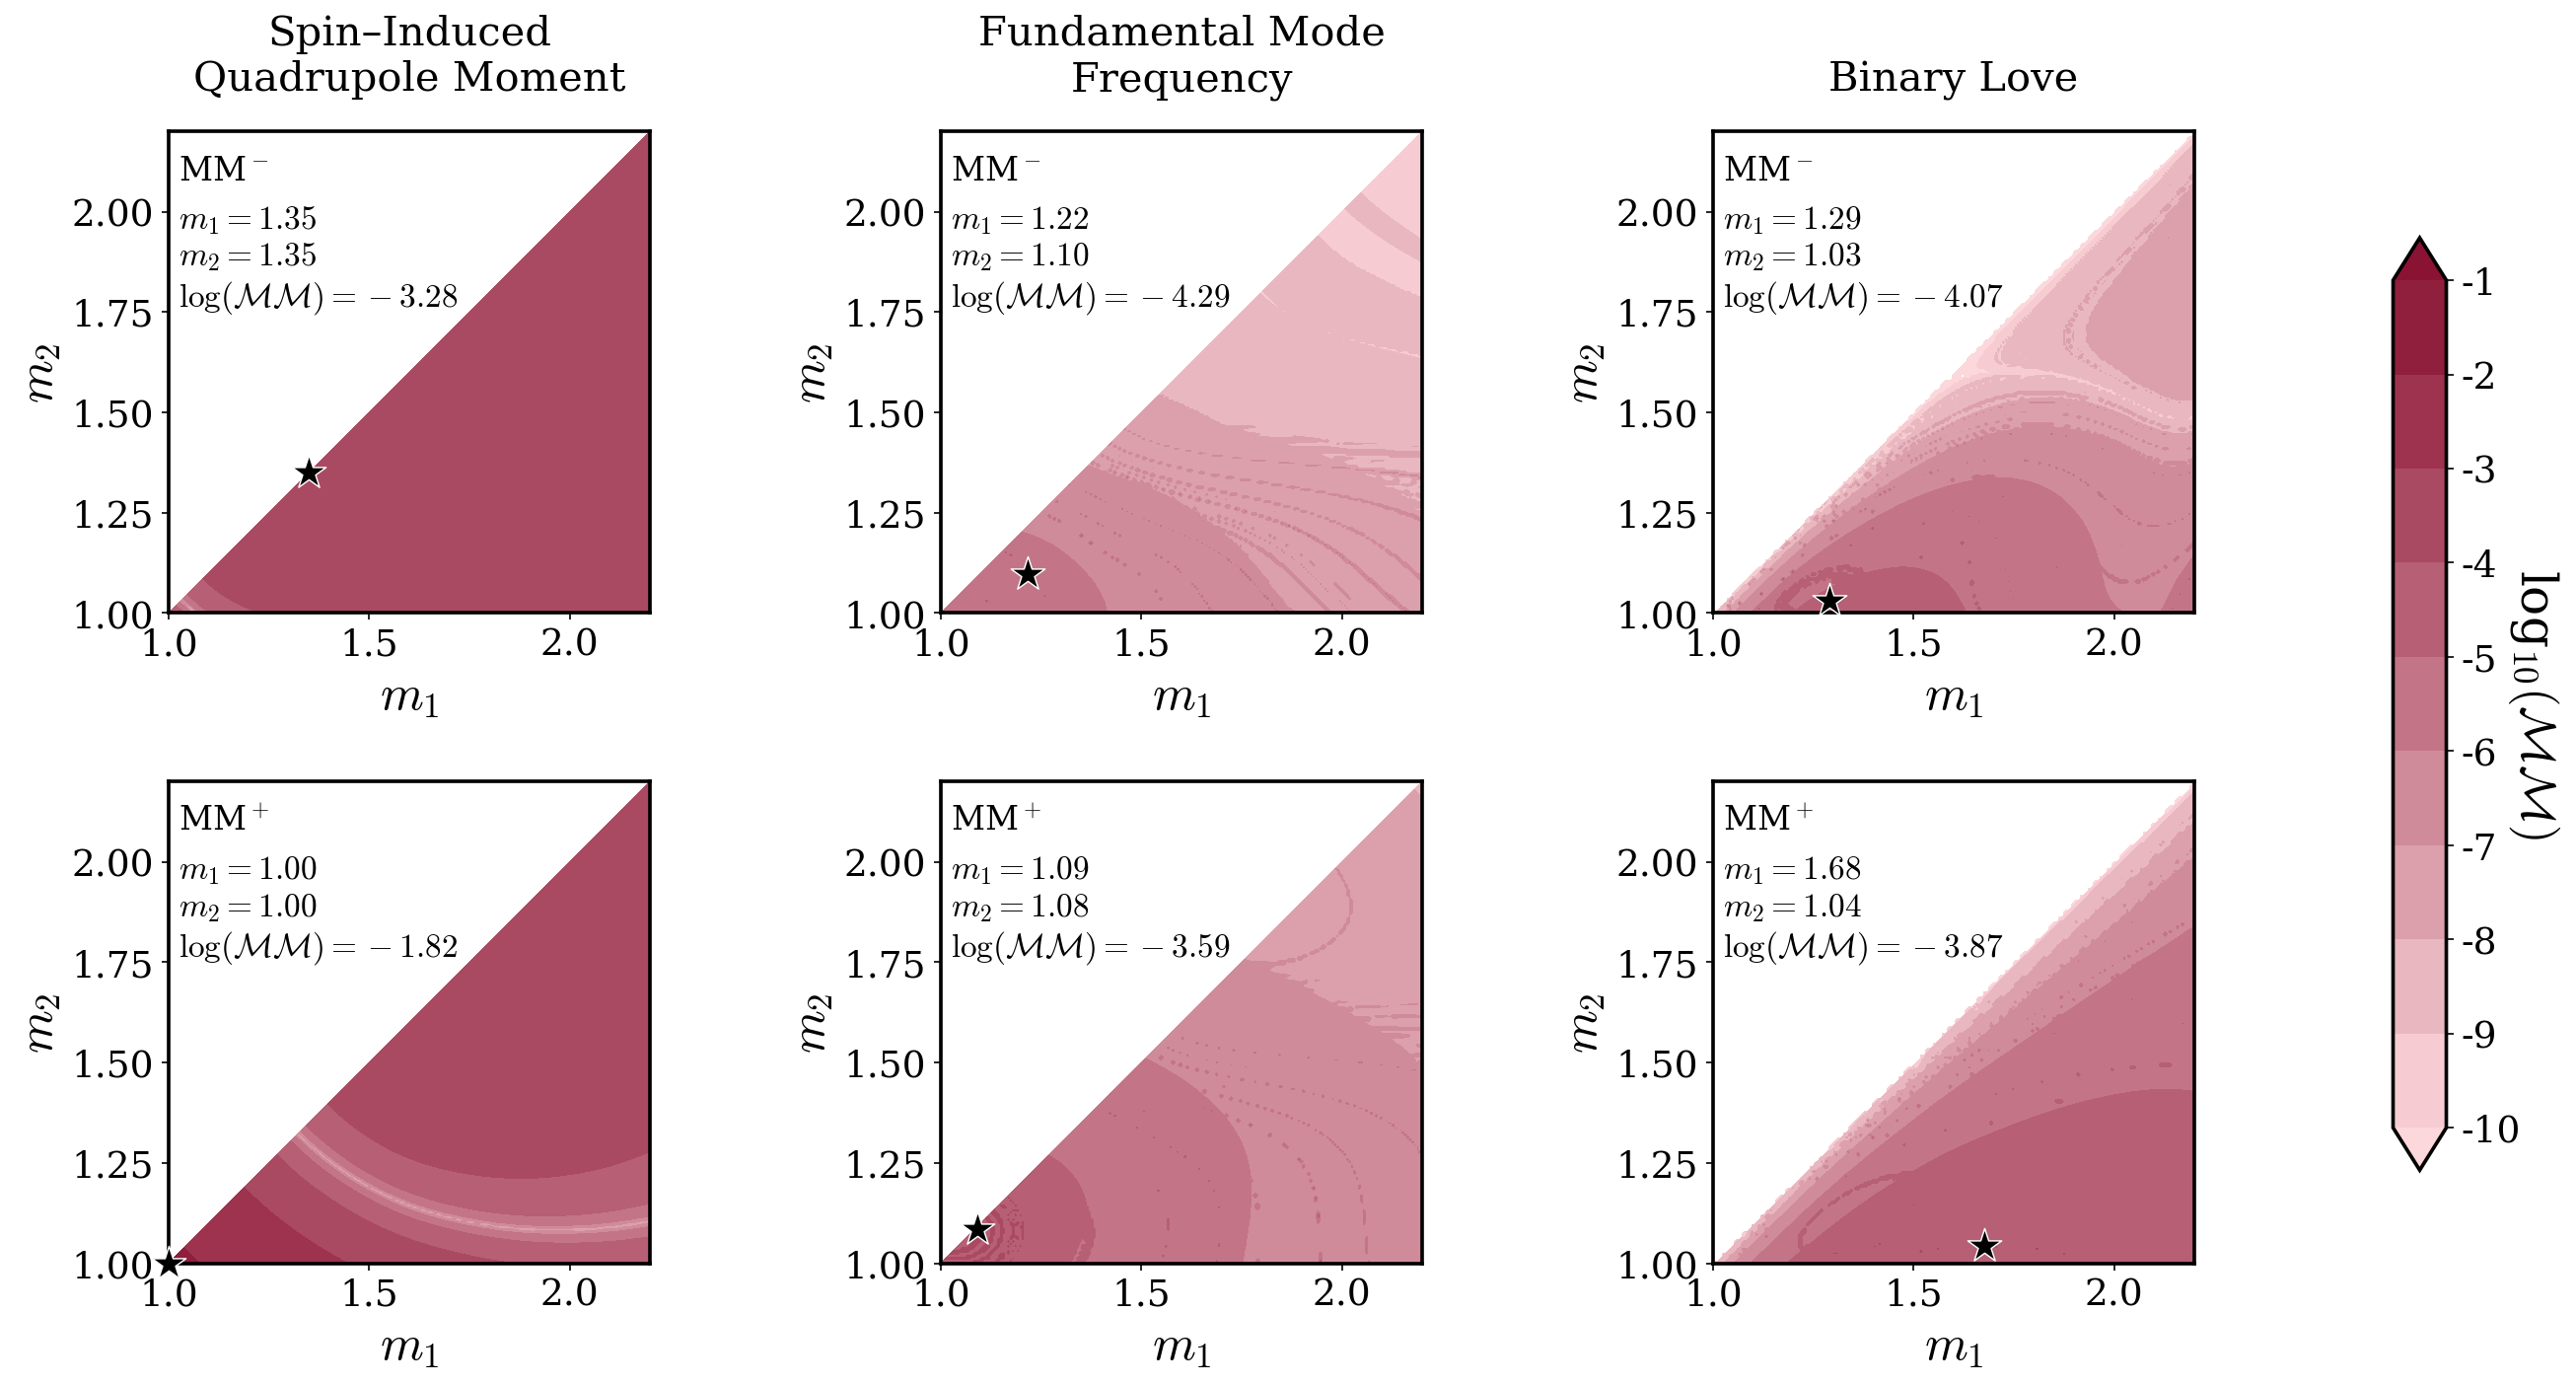

In [8]:
URs = ['Spin Induced Quadrupole Moment', 'Fundamental Mode Frequency', 'Binary Love']
soft_files = ['soft_MM_quad.txt', 'soft_MM_fmode.txt', 'soft_MM_BL.txt']
stiff_files = ['stiff_MM_quad.txt', 'stiff_MM_fmode.txt', 'stiff_MM_BL.txt']
soft_max = [('m1_max_quad_soft', 'm2_max_quad_soft'),
            ('m1_max_fmode_soft', 'm2_max_fmode_soft'),
            ('m1_max_BL_soft', 'm2_max_BL_soft')]
stiff_max = [('m1_max_quad_stiff', 'm2_max_quad_stiff'),
            ('m1_max_fmode_stiff', 'm2_max_fmode_stiff'),
            ('m1_max_BL_stiff', 'm2_max_BL_stiff')]

n_rows = 2
n_cols = len(URs)
fig = plt.figure(figsize=(18, 9), dpi=150)  # slightly narrower figure
gs = gridspec.GridSpec(n_rows, n_cols, width_ratios=[1]*n_cols, height_ratios=[1,1], 
                       wspace=0.0, hspace=0.35)  # keep wspace 0

# For soft EOS
max_MM_soft_vals = [max_value_quad_soft, max_value_fmode_soft, max_value_BL_soft]

# For stiff EOS
max_MM_stiff_vals = [max_value_quad_stiff, max_value_fmode_stiff, max_value_BL_stiff]

n = 200  # number of points in the mass grid
m1s, m2s = np.meshgrid(np.linspace(1.0, 2.2, n), np.linspace(1.0, 2.2, n))
UR_titles = [
    "Spin–Induced\nQuadrupole Moment",
    "Fundamental Mode\nFrequency",
    "Binary Love"
]
color = 0
dark_color = sns.husl_palette(l=0.3)[color]   # darkest
light_color = sns.husl_palette(l=0.9)[color]  # lightest
cmap = LinearSegmentedColormap.from_list("husl_blue_range", [light_color, dark_color], N=256)

# Shared colorbar limits and levels
vmin = -10
vmax = -1
levels = np.arange(vmin, vmax+1, 1)

for col, UR in enumerate(URs):
    soft_MM = np.loadtxt(f'/work/williams5/testing-urs/bilby/scripts/mismatches/{soft_files[col]}')
    stiff_MM = np.loadtxt(f'/work/williams5/testing-urs/bilby/scripts/mismatches/{stiff_files[col]}')
    max_x_soft, max_y_soft = globals()[soft_max[col][0]], globals()[soft_max[col][1]]
    max_x_stiff, max_y_stiff = globals()[stiff_max[col][0]], globals()[stiff_max[col][1]]

    soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
    stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)

    # --- Soft row (top) ---
    ax_soft = fig.add_subplot(gs[0, col])
    cp = ax_soft.contourf(m1s, m2s, soft_plot, cmap=cmap, levels=levels, extend='both')
    ax_soft.scatter(max_x_soft, max_y_soft, c='black', marker='*', s=300, zorder=200, clip_on=False,
                    edgecolors='white', linewidths=0.7)

    ax_soft.set_xlabel(r'$m_1$')
    ax_soft.set_ylabel(r'$m_2$')
    ax_soft.set_aspect('equal')
    ax_soft.text(0.02, 0.95, r'MM$^-$', transform=ax_soft.transAxes, ha='left', va='top', fontsize=16)
    ax_soft.text(0.02, 0.85,
                 f'$m_1={max_x_soft:.2f}$\n$m_2={max_y_soft:.2f}$\n$\\log(\\mathcal{{MM}})={np.log10(max_MM_soft_vals[col]):.2f}$',
                 transform=ax_soft.transAxes, ha='left', va='top', fontsize=16)

    # --- Add centered multi-line title for this subplot ---
    ax_soft.set_title(UR_titles[col], fontsize=20, pad=20)  # pad moves title away from plot

    # --- Stiff row (bottom) ---
    ax_stiff = fig.add_subplot(gs[1, col])
    cp = ax_stiff.contourf(m1s, m2s, stiff_plot, cmap=cmap, levels=levels, extend='both')
    ax_stiff.scatter(max_x_stiff, max_y_stiff, c='black', marker='*', s=300, zorder=200, clip_on=False,
                     edgecolors='white', linewidths=0.7)
    ax_stiff.set_xlabel(r'$m_1$')
    ax_stiff.set_ylabel(r'$m_2$')
    ax_stiff.set_aspect('equal')
    ax_stiff.text(0.02, 0.95, r'MM$^+$', transform=ax_stiff.transAxes, ha='left', va='top', fontsize=16)
    ax_stiff.text(0.02, 0.85,
                  f'$m_1={max_x_stiff:.2f}$\n$m_2={max_y_stiff:.2f}$\n$\\log(\\mathcal{{MM}})={np.log10(max_MM_stiff_vals[col]):.2f}$',
                  transform=ax_stiff.transAxes, ha='left', va='top', fontsize=16)


# --- Expand subplots across figure to reduce gaps ---
fig.subplots_adjust(left=0.03, right=0.90, top=0.93, bottom=0.08)

# --- Shared colorbar ---
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cp, cax=cax, ticks=np.arange(vmin, vmax+1, 1))
cbar.set_label(r'log$_{10}(\mathcal{MM})$', rotation=270, labelpad=20)

plt.savefig("UR_MM.pdf", dpi=600, bbox_inches='tight')
plt.show()


/tmp/ipykernel_1015887/1490214805.py:88: RuntimeWarning: divide by zero encountered in log10
  soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
/tmp/ipykernel_1015887/1490214805.py:88: RuntimeWarning: invalid value encountered in log10
  soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
/tmp/ipykernel_1015887/1490214805.py:89: RuntimeWarning: divide by zero encountered in log10
  stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)
/tmp/ipykernel_1015887/1490214805.py:89: RuntimeWarning: invalid value encountered in log10
  stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)


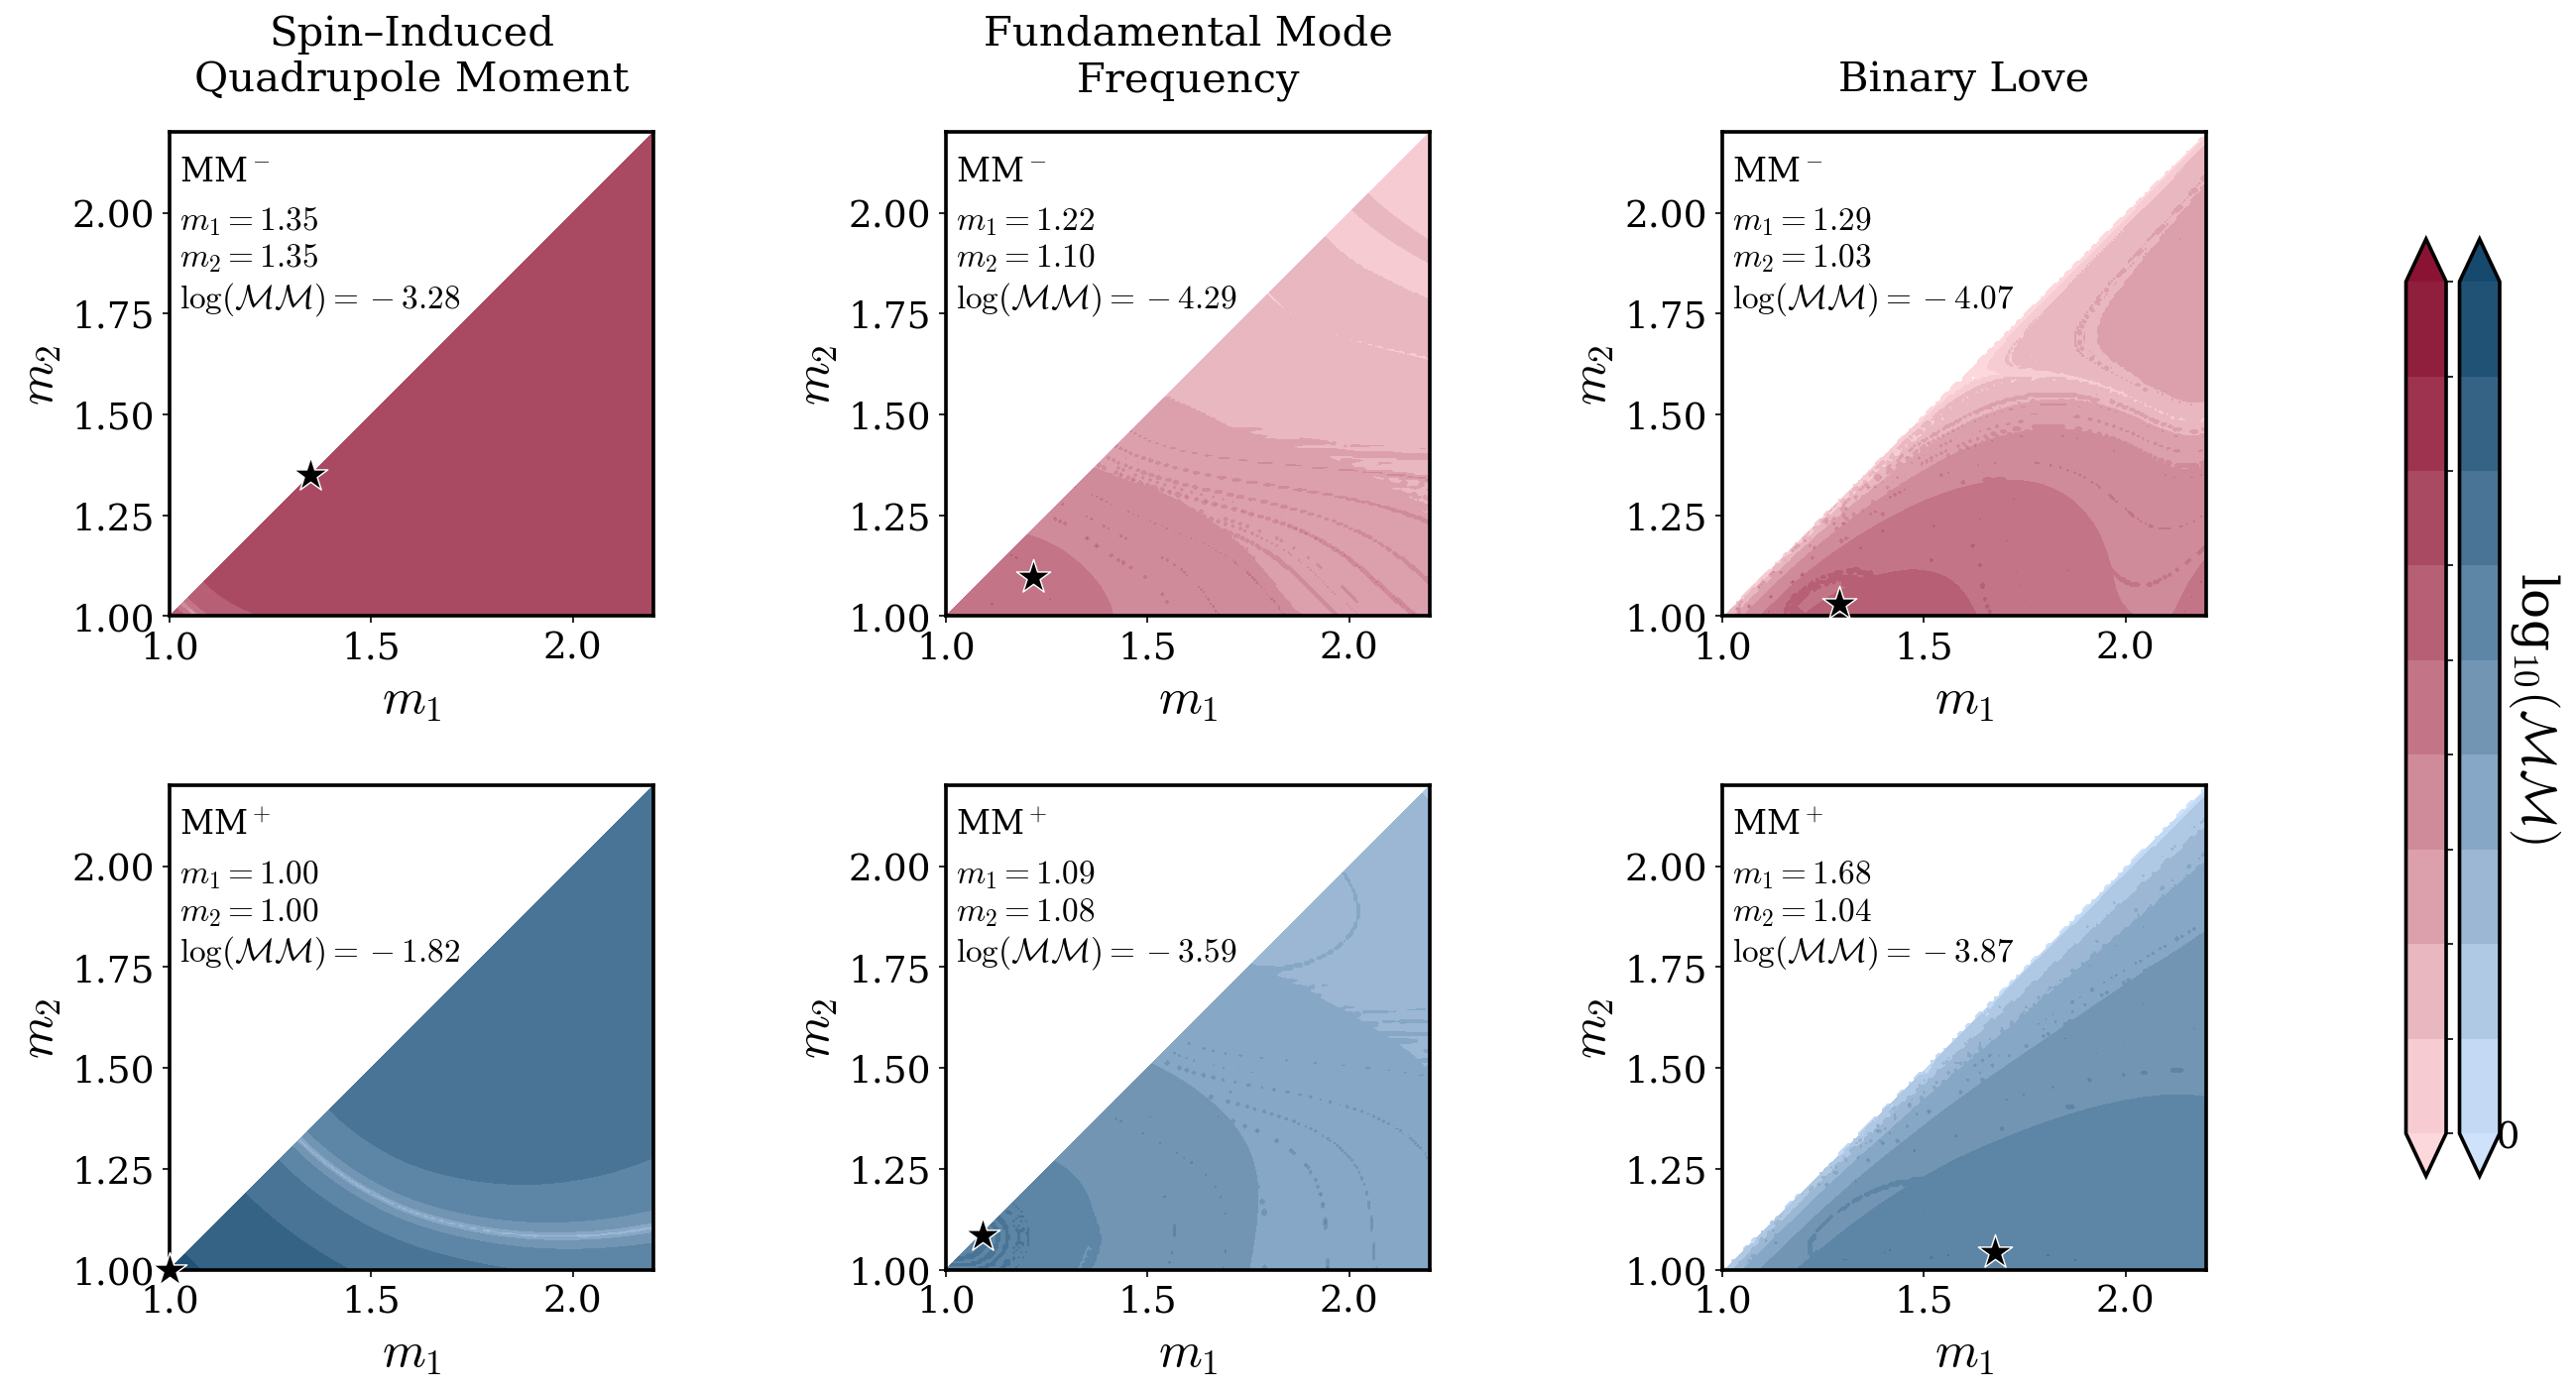

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap

URs = ['Spin Induced Quadrupole Moment', 'Fundamental Mode Frequency', 'Binary Love']
soft_files = ['soft_MM_quad.txt', 'soft_MM_fmode.txt', 'soft_MM_BL.txt']
stiff_files = ['stiff_MM_quad.txt', 'stiff_MM_fmode.txt', 'stiff_MM_BL.txt']

soft_max = [('m1_max_quad_soft', 'm2_max_quad_soft'),
            ('m1_max_fmode_soft', 'm2_max_fmode_soft'),
            ('m1_max_BL_soft', 'm2_max_BL_soft')]

stiff_max = [('m1_max_quad_stiff', 'm2_max_quad_stiff'),
             ('m1_max_fmode_stiff', 'm2_max_fmode_stiff'),
             ('m1_max_BL_stiff', 'm2_max_BL_stiff')]

n_rows = 2
n_cols = len(URs)

fig = plt.figure(figsize=(18, 9), dpi=150)
gs = gridspec.GridSpec(
    n_rows, n_cols,
    width_ratios=[1] * n_cols,
    height_ratios=[1, 1],
    wspace=0.0,
    hspace=0.35
)

# For soft EOS
max_MM_soft_vals = [max_value_quad_soft, max_value_fmode_soft, max_value_BL_soft]

# For stiff EOS
max_MM_stiff_vals = [max_value_quad_stiff, max_value_fmode_stiff, max_value_BL_stiff]

n = 200
m1s, m2s = np.meshgrid(
    np.linspace(1.0, 2.2, n),
    np.linspace(1.0, 2.2, n)
)

UR_titles = [
    "Spin–Induced\nQuadrupole Moment",
    "Fundamental Mode\nFrequency",
    "Binary Love"
]

# ------------------------------------------------------------------
# Colormaps
# ------------------------------------------------------------------
# Pink (soft / top)
pink_idx = 0
pink_dark = sns.husl_palette(l=0.3)[pink_idx]
pink_light = sns.husl_palette(l=0.9)[pink_idx]
cmap_soft = LinearSegmentedColormap.from_list(
    "husl_pink_range", [pink_light, pink_dark], N=256
)

# Blue (stiff / bottom)
blue_idx = 4
blue_dark = sns.husl_palette(l=0.3)[blue_idx]
blue_light = sns.husl_palette(l=0.9)[blue_idx]
cmap_stiff = LinearSegmentedColormap.from_list(
    "husl_blue_range", [blue_light, blue_dark], N=256
)

# Shared colorbar limits
vmin = -10
vmax = -1
levels = np.arange(vmin, vmax + 1, 1)

# ------------------------------------------------------------------
# Plot loop
# ------------------------------------------------------------------
for col, UR in enumerate(URs):

    soft_MM = np.loadtxt(
        f'/work/williams5/testing-urs/bilby/scripts/mismatches/{soft_files[col]}'
    )
    stiff_MM = np.loadtxt(
        f'/work/williams5/testing-urs/bilby/scripts/mismatches/{stiff_files[col]}'
    )

    max_x_soft, max_y_soft = globals()[soft_max[col][0]], globals()[soft_max[col][1]]
    max_x_stiff, max_y_stiff = globals()[stiff_max[col][0]], globals()[stiff_max[col][1]]

    soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
    stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)

    # ------------------ Soft row (top) ------------------
    ax_soft = fig.add_subplot(gs[0, col])
    cp_soft = ax_soft.contourf(
        m1s, m2s, soft_plot,
        cmap=cmap_soft, levels=levels, extend='both'
    )

    ax_soft.scatter(
        max_x_soft, max_y_soft,
        c='black', marker='*', s=300,
        zorder=200, clip_on=False,
        edgecolors='white', linewidths=0.7
    )

    ax_soft.set_xlabel(r'$m_1$')
    ax_soft.set_ylabel(r'$m_2$')
    ax_soft.set_aspect('equal')

    ax_soft.text(0.02, 0.95, r'MM$^-$',
                 transform=ax_soft.transAxes,
                 ha='left', va='top', fontsize=16)

    ax_soft.text(
        0.02, 0.85,
        f'$m_1={max_x_soft:.2f}$\n'
        f'$m_2={max_y_soft:.2f}$\n'
        f'$\\log(\\mathcal{{MM}})={np.log10(max_MM_soft_vals[col]):.2f}$',
        transform=ax_soft.transAxes,
        ha='left', va='top', fontsize=16
    )

    ax_soft.set_title(UR_titles[col], fontsize=20, pad=20)

    # ------------------ Stiff row (bottom) ------------------
    ax_stiff = fig.add_subplot(gs[1, col])
    cp_stiff = ax_stiff.contourf(
        m1s, m2s, stiff_plot,
        cmap=cmap_stiff, levels=levels, extend='both'
    )

    ax_stiff.scatter(
        max_x_stiff, max_y_stiff,
        c='black', marker='*', s=300,
        zorder=200, clip_on=False,
        edgecolors='white', linewidths=0.7
    )

    ax_stiff.set_xlabel(r'$m_1$')
    ax_stiff.set_ylabel(r'$m_2$')
    ax_stiff.set_aspect('equal')

    ax_stiff.text(0.02, 0.95, r'MM$^+$',
                  transform=ax_stiff.transAxes,
                  ha='left', va='top', fontsize=16)

    ax_stiff.text(
        0.02, 0.85,
        f'$m_1={max_x_stiff:.2f}$\n'
        f'$m_2={max_y_stiff:.2f}$\n'
        f'$\\log(\\mathcal{{MM}})={np.log10(max_MM_stiff_vals[col]):.2f}$',
        transform=ax_stiff.transAxes,
        ha='left', va='top', fontsize=16
    )

# ------------------------------------------------------------------
# Layout adjustments
# ------------------------------------------------------------------
fig.subplots_adjust(left=0.03, right=0.90, top=0.93, bottom=0.08)

# ------------------------------------------------------------------
# Dual colorbars (shared scale)
# ------------------------------------------------------------------
# Pink (with labels & ticks)
cax_soft = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar_soft = fig.colorbar(cp_soft, cax=cax_soft, ticks=levels)
cbar_soft.set_label(r'log$_{10}(\mathcal{MM})$', rotation=270, labelpad=20)

# Blue (no labels or ticks)
cax_stiff = fig.add_axes([0.94, 0.15, 0.015, 0.7])
cbar_stiff = fig.colorbar(cp_stiff, cax=cax_stiff)
cbar_stiff.ax.tick_params(labelleft=False, labelright=False, length=0)

plt.savefig("UR_MM.pdf", dpi=600, bbox_inches='tight')
plt.show()


/tmp/ipykernel_1015887/1781751304.py:104: RuntimeWarning: divide by zero encountered in log10
  soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
/tmp/ipykernel_1015887/1781751304.py:104: RuntimeWarning: invalid value encountered in log10
  soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
/tmp/ipykernel_1015887/1781751304.py:105: RuntimeWarning: divide by zero encountered in log10
  stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)
/tmp/ipykernel_1015887/1781751304.py:105: RuntimeWarning: invalid value encountered in log10
  stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)


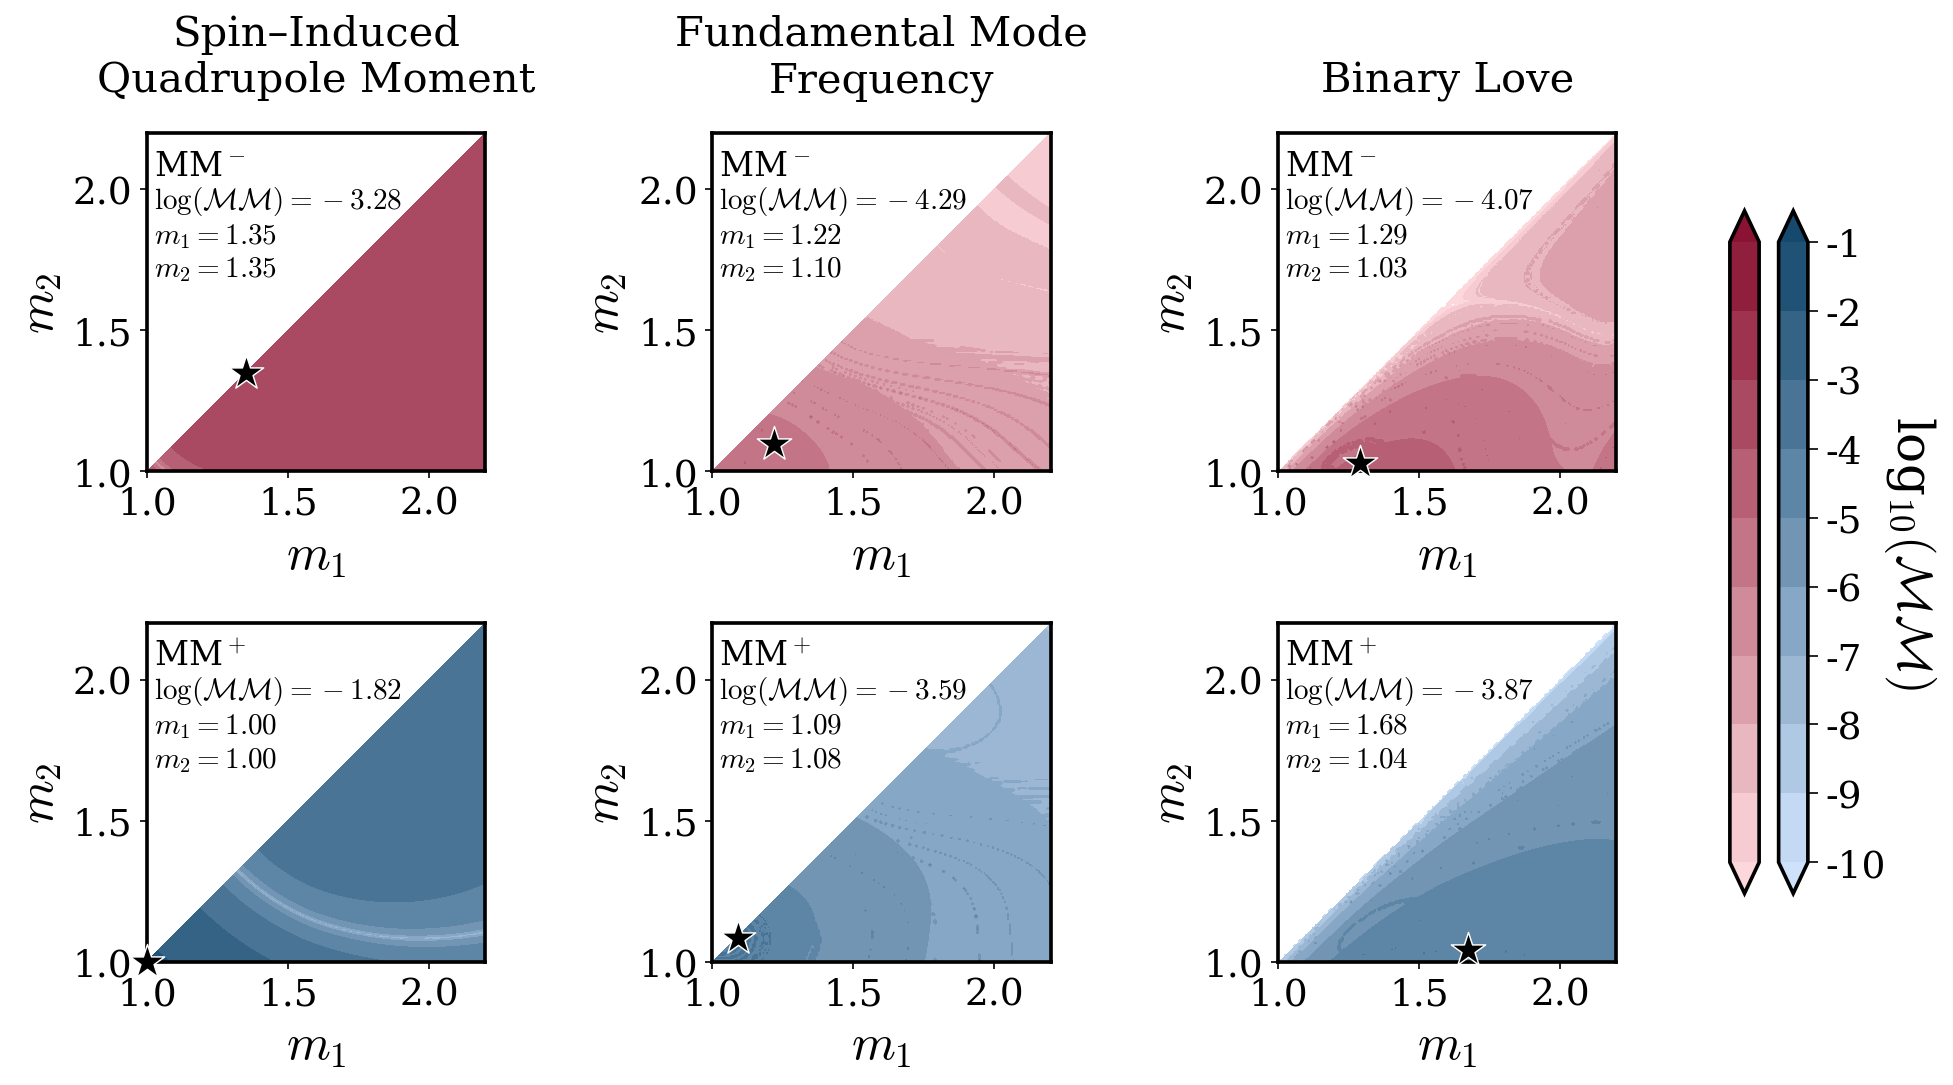

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl

fs = 24
mpl.rcParams.update({
    'axes.linewidth': 1.75,
    'axes.labelsize': fs,
    'axes.titlesize': 32,
    'font.size': fs-4,
    'legend.fontsize': fs-4,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'lines.linewidth': 3,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})


URs = ['Spin Induced Quadrupole Moment', 'Fundamental Mode Frequency', 'Binary Love']
soft_files = ['soft_MM_quad.txt', 'soft_MM_fmode.txt', 'soft_MM_BL.txt']
stiff_files = ['stiff_MM_quad.txt', 'stiff_MM_fmode.txt', 'stiff_MM_BL.txt']

soft_max = [('m1_max_quad_soft', 'm2_max_quad_soft'),
            ('m1_max_fmode_soft', 'm2_max_fmode_soft'),
            ('m1_max_BL_soft', 'm2_max_BL_soft')]

stiff_max = [('m1_max_quad_stiff', 'm2_max_quad_stiff'),
             ('m1_max_fmode_stiff', 'm2_max_fmode_stiff'),
             ('m1_max_BL_stiff', 'm2_max_BL_stiff')]

n_rows = 2
n_cols = len(URs)

fig = plt.figure(figsize=(13, 6.5), dpi=150)
gs = gridspec.GridSpec(
    n_rows, n_cols,
    width_ratios=[1] * n_cols,
    height_ratios=[1, 1],
    wspace=0.0,
    hspace=0.45
)

# For soft EOS
max_MM_soft_vals = [max_value_quad_soft, max_value_fmode_soft, max_value_BL_soft]

# For stiff EOS
max_MM_stiff_vals = [max_value_quad_stiff, max_value_fmode_stiff, max_value_BL_stiff]

n = 200
m1s, m2s = np.meshgrid(
    np.linspace(1.0, 2.2, n),
    np.linspace(1.0, 2.2, n)
)

UR_titles = [
    "Spin–Induced\nQuadrupole Moment",
    "Fundamental Mode\nFrequency",
    "Binary Love"
]

# ------------------------------------------------------------------
# Colormaps
# ------------------------------------------------------------------
# Pink (soft / top) - no tick labels on colorbar
pink_idx = 0
pink_dark = sns.husl_palette(l=0.3)[pink_idx]
pink_light = sns.husl_palette(l=0.9)[pink_idx]
cmap_soft = LinearSegmentedColormap.from_list(
    "husl_pink_range", [pink_light, pink_dark], N=256
)

# Blue (stiff / bottom) - more vibrant
blue_idx = 4
blue_dark = sns.husl_palette(l=0.3)[blue_idx]
blue_light = sns.husl_palette(l=0.9)[blue_idx]
cmap_stiff = LinearSegmentedColormap.from_list(
    "husl_blue_range", [blue_light, blue_dark], N=256
)

# Shared colorbar limits
vmin = -10
vmax = -1
levels = np.arange(vmin, vmax + 1, 1)

# ------------------------------------------------------------------
# Plot loop
# ------------------------------------------------------------------
for col, UR in enumerate(URs):

    soft_MM = np.loadtxt(
        f'/work/williams5/testing-urs/bilby/scripts/mismatches/{soft_files[col]}'
    )
    stiff_MM = np.loadtxt(
        f'/work/williams5/testing-urs/bilby/scripts/mismatches/{stiff_files[col]}'
    )

    max_x_soft, max_y_soft = globals()[soft_max[col][0]], globals()[soft_max[col][1]]
    max_x_stiff, max_y_stiff = globals()[stiff_max[col][0]], globals()[stiff_max[col][1]]

    soft_plot = np.clip(np.log10(soft_MM), vmin, vmax)
    stiff_plot = np.clip(np.log10(stiff_MM), vmin, vmax)

    # ------------------ Soft row (top) ------------------
    ax_soft = fig.add_subplot(gs[0, col])
    cp_soft = ax_soft.contourf(
        m1s, m2s, soft_plot,
        cmap=cmap_soft, levels=levels, extend='both'
    )

    ax_soft.scatter(
        max_x_soft, max_y_soft,
        c='black', marker='*', s=300,
        zorder=200, clip_on=False,
        edgecolors='white', linewidths=0.7
    )

    ax_soft.set_xlabel(r'$m_1$')
    ax_soft.set_ylabel(r'$m_2$')
    ax_soft.set_aspect('equal')

    ax_soft.text(0.02, 0.95, r'MM$^-$',
                 transform=ax_soft.transAxes,
                 ha='left', va='top', fontsize=16)

    ax_soft.text(
        0.02, 0.85,
        f'$\\log(\\mathcal{{MM}})={np.log10(max_MM_soft_vals[col]):.2f}$\n'
        f'$m_1={max_x_soft:.2f}$\n'
        f'$m_2={max_y_soft:.2f}$',
        transform=ax_soft.transAxes,
        ha='left', va='top', fontsize=14
    )

    ax_soft.set_title(UR_titles[col], fontsize=20, pad=20)
    ax_soft.tick_params(axis='both', labelsize=18)

    # ------------------ Stiff row (bottom) ------------------
    ax_stiff = fig.add_subplot(gs[1, col])
    cp_stiff = ax_stiff.contourf(
        m1s, m2s, stiff_plot,
        cmap=cmap_stiff, levels=levels, extend='both'
    )

    ax_stiff.scatter(
        max_x_stiff, max_y_stiff,
        c='black', marker='*', s=300,
        zorder=200, clip_on=False,
        edgecolors='white', linewidths=0.7
    )

    ax_stiff.set_xlabel(r'$m_1$')
    ax_stiff.set_ylabel(r'$m_2$')
    ax_stiff.set_aspect('equal')

    ax_stiff.text(0.02, 0.95, r'MM$^+$',
                  transform=ax_stiff.transAxes,
                  ha='left', va='top', fontsize=16)

    ax_stiff.text(
        0.02, 0.85,
        f'$\\log(\\mathcal{{MM}})={np.log10(max_MM_stiff_vals[col]):.2f}$\n'
        f'$m_1={max_x_stiff:.2f}$\n'
        f'$m_2={max_y_stiff:.2f}$\n',
        transform=ax_stiff.transAxes,
        ha='left', va='top', fontsize=14
    )
    ax_stiff.tick_params(axis='both', labelsize=18)

# ------------------------------------------------------------------
# Layout adjustments
# ------------------------------------------------------------------
fig.subplots_adjust(left=0.03, right=0.90, top=0.93, bottom=0.08)

# ------------------------------------------------------------------
# Dual colorbars (shared scale)
# ------------------------------------------------------------------
# Pink colorbar (left) — no ticks, only label
cax_soft = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar_soft = fig.colorbar(cp_soft, cax=cax_soft)
cbar_soft.ax.tick_params(left=False, right=False, labelleft=False, labelright=False, labelsize=18)

# Blue colorbar (right) — full ticks and numbers on the right
cax_stiff = fig.add_axes([0.925, 0.15, 0.015, 0.7])
cbar_stiff = fig.colorbar(cp_stiff, cax=cax_stiff, ticks=levels)
cbar_stiff.ax.yaxis.set_tick_params(labelleft=False, labelright=True, length=5, labelsize=18)
cbar_stiff.set_label(r'log$_{10}(\mathcal{MM})$', rotation=270, labelpad=25)

plt.savefig("UR_MM.pdf", dpi=600, bbox_inches='tight')
plt.show()
